In [108]:
%load_ext kedro.ipython
# %reload_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [110]:
X_train = catalog.load('HP_train')
Y_train = catalog.load('Y_train')
X_test = catalog.load('HP_test')
Y_test = catalog.load('Y_test')

[01/13/25 23:01:21] INFO     Loading data from HP_train (CSVDataset)...                         ]8;id=57674;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=929306;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from Y_train (CSVDataset)...                          ]8;id=224434;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=477668;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from HP_test (CSVDataset)...                          ]8;id=767115;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=376133;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from Y_test (CSVDataset)...                           ]8;id=493830;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=73169;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [111]:
catalog.load("house_prices")

[01/13/25 23:01:25] INFO     Loading data from house_prices (CSVDataset)...                     ]8;id=798609;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=347754;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.6500,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.0500,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.0000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.4400,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.3650,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1992-01-06,1992Q1,1505832,Villa,family_sale,1970,1122000,0.0,4,150.0,7480.0000,Brudedalen 30,3520,Farum,North Zealand,Zealand,9.5,2.1,10.14
99996,1992-01-06,1992Q1,1505823,Villa,regular_sale,1898,452000,0.0,5,102.0,4431.3726,Bregningevej 1,4593,Eskebjerg,Other islands,Zealand,9.5,2.1,10.14
99997,1992-01-06,1992Q1,1505817,Apartment,regular_sale,1890,1285000,0.0,4,246.0,5223.5770,"Rosengade 15, 1",4200,Slagelse,Other islands,Zealand,9.5,2.1,10.14
99998,1992-01-05,1992Q1,1505868,Villa,family_sale,1954,800000,0.0,6,147.0,5442.1770,Nygårdsvej 112,6700,Esbjerg,South jutland,Jutland,9.5,2.1,10.14


Investigating columns and their types, to assess if we need encoding

In [112]:
X_train.columns


Index(['date', 'quarter', 'house_id', 'house_type', 'sales_type', 'year_build',
       '%_change_between_offer_and_purchase', 'no_rooms', 'sqm', 'sqm_price',
       'address', 'zip_code', 'city', 'area', 'region', 'nom_interest_rate%',
       'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%'],
      dtype='object')

In [113]:
X_train.dtypes


date                                    object
quarter                                 object
house_id                                 int64
house_type                              object
sales_type                              object
year_build                               int64
%_change_between_offer_and_purchase    float64
no_rooms                                 int64
sqm                                    float64
sqm_price                              float64
address                                 object
zip_code                                 int64
city                                    object
area                                    object
region                                  object
nom_interest_rate%                     float64
dk_ann_infl_rate%                      float64
yield_on_mortgage_credit_bonds%        float64
dtype: object

Missing values - will need to perform imputation

In [114]:
missing_values = X_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

city                               10
dk_ann_infl_rate%                  63
yield_on_mortgage_credit_bonds%    63
dtype: int64


In [115]:
missing_values = X_test.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

city                                1
dk_ann_infl_rate%                  14
yield_on_mortgage_credit_bonds%    14
dtype: int64


In [120]:
Y_train.describe()


,purchase_price
count,7.800200e+04
mean,1.742009e+06
std,1.266998e+06
min,2.502000e+05
25%,7.950000e+05
50%,1.374000e+06
75%,2.348000e+06
max,6.505000e+06


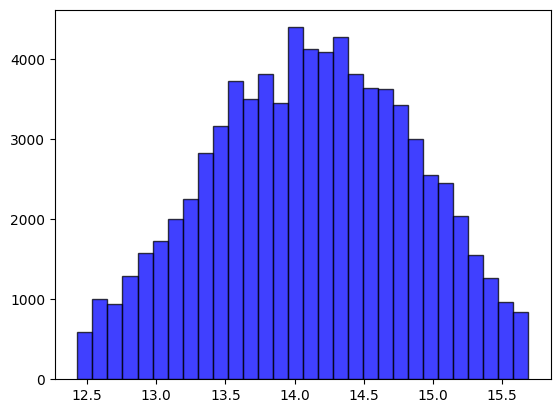

In [124]:
plt.hist(np.log(Y_train), bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.show()

In [93]:
Y_test.describe()

,purchase_price
count,2.000000e+04
mean,1.918750e+06
std,1.773023e+06
min,2.509600e+05
25%,8.000000e+05
50%,1.400000e+06
75%,2.450000e+06
max,4.595500e+07


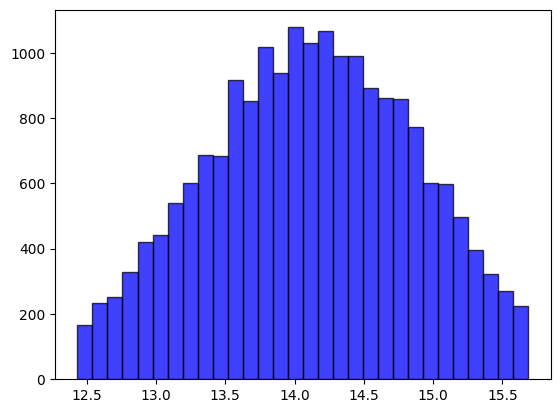

In [125]:
plt.hist(np.log(Y_test), bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.show()

In [126]:
# updating the taget variable
Y_train = np.log(Y_train)
catalog.save("Y_train", Y_train)


[01/13/25 23:11:47] INFO     Saving data to Y_train (CSVDataset)...                             ]8;id=596480;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=318453;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#431\431]8;;\

                    INFO     Saving data to Y_test (CSVDataset)...                              ]8;id=802741;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=726865;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#431\431]8;;\

In [132]:
def plot_histograms(dataframe, bins=20, figsize=(12, 8)):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns  # Select only numeric columns
    num_columns = len(numeric_columns)
    rows = (num_columns + 2) // 3  # Adjust rows for up to 3 plots per row
    
    plt.figure(figsize=(figsize[0], figsize[1] * rows))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i + 1)  # Up to 3 plots per row
        dataframe[column].hist(bins=bins, alpha=0.75, color='blue', edgecolor='black')
        plt.title(column)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

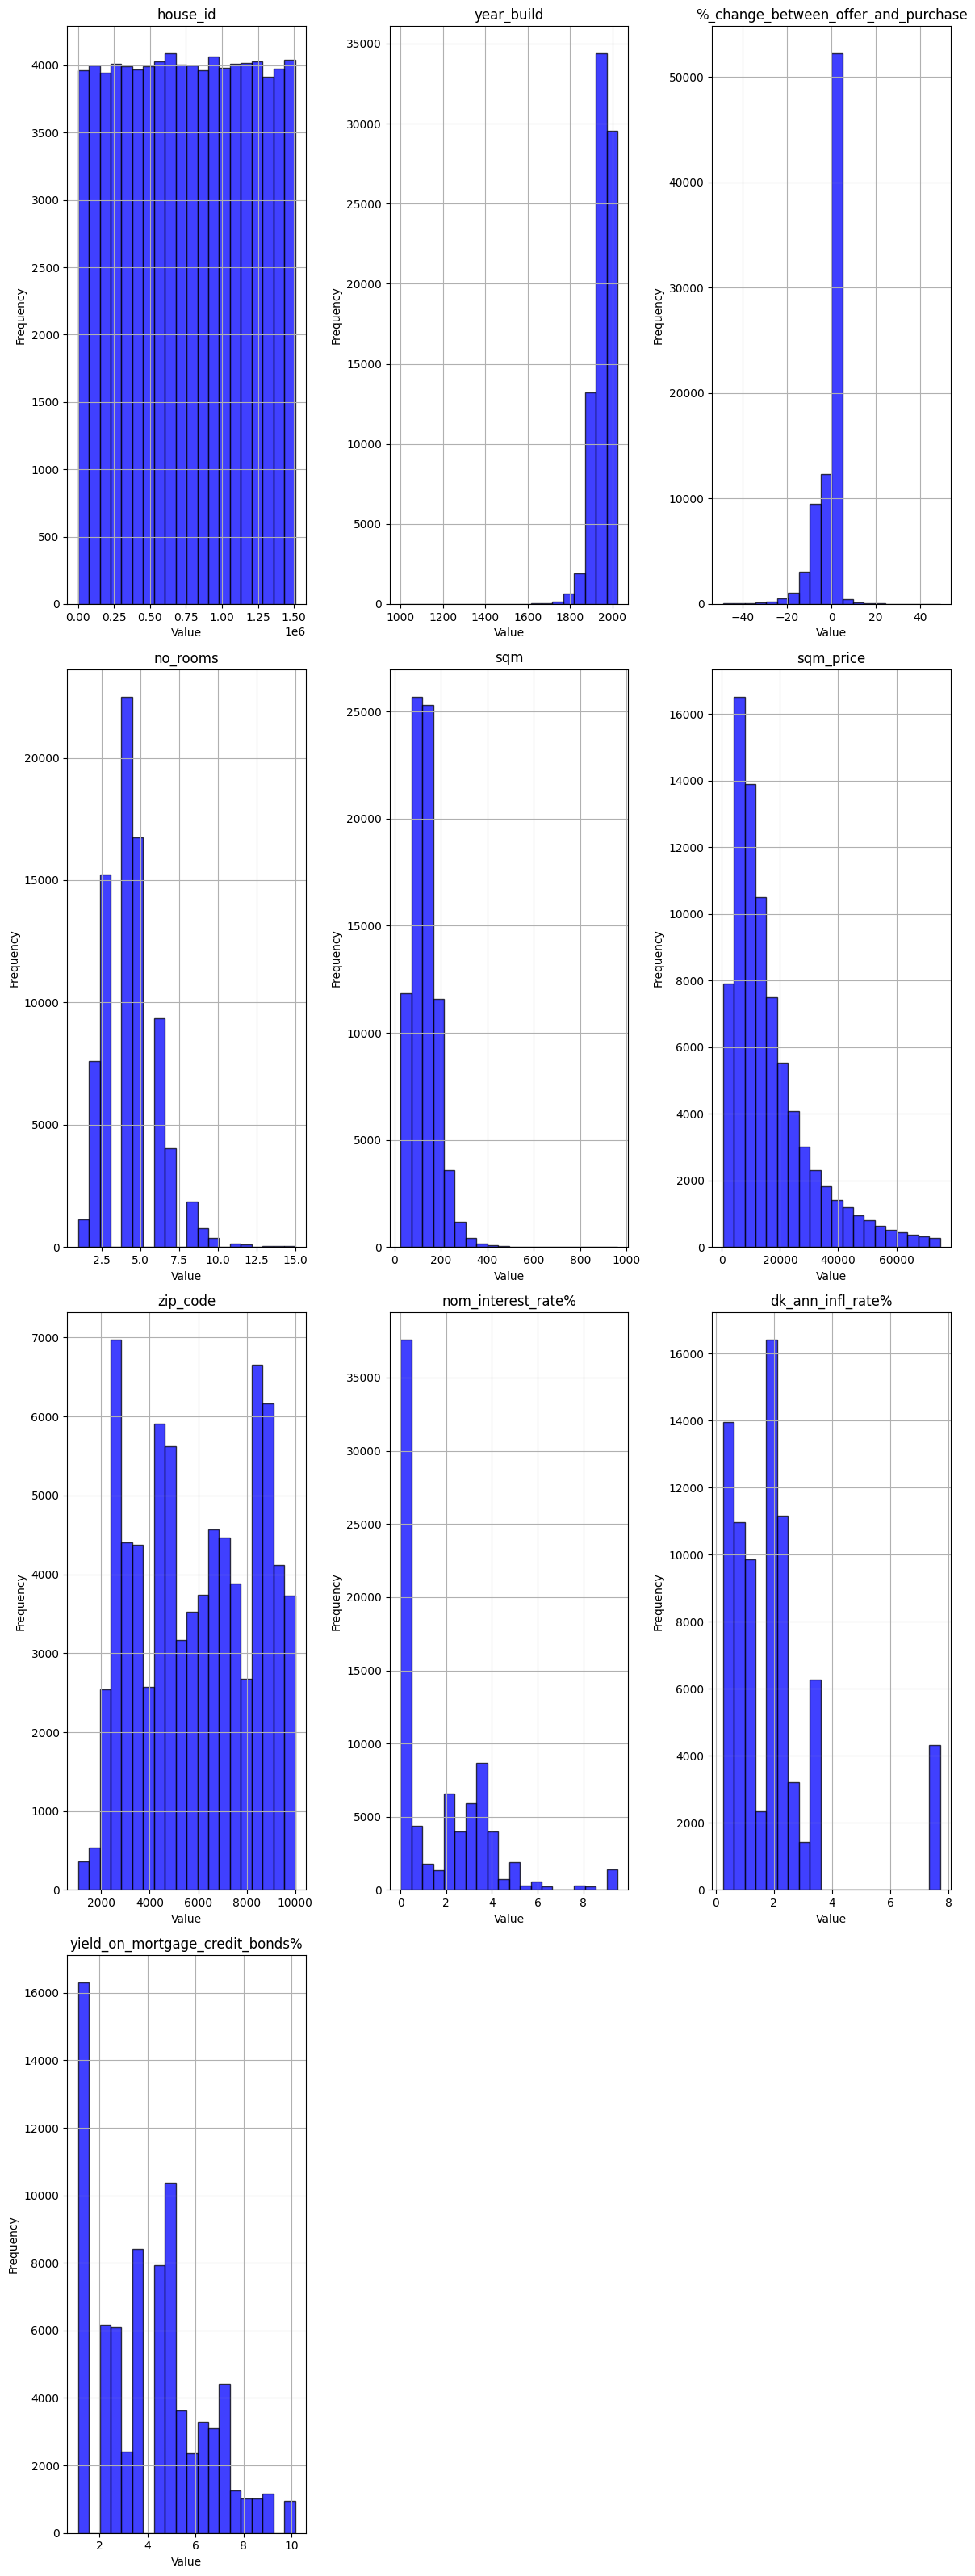

In [133]:
plot_histograms(X_train)

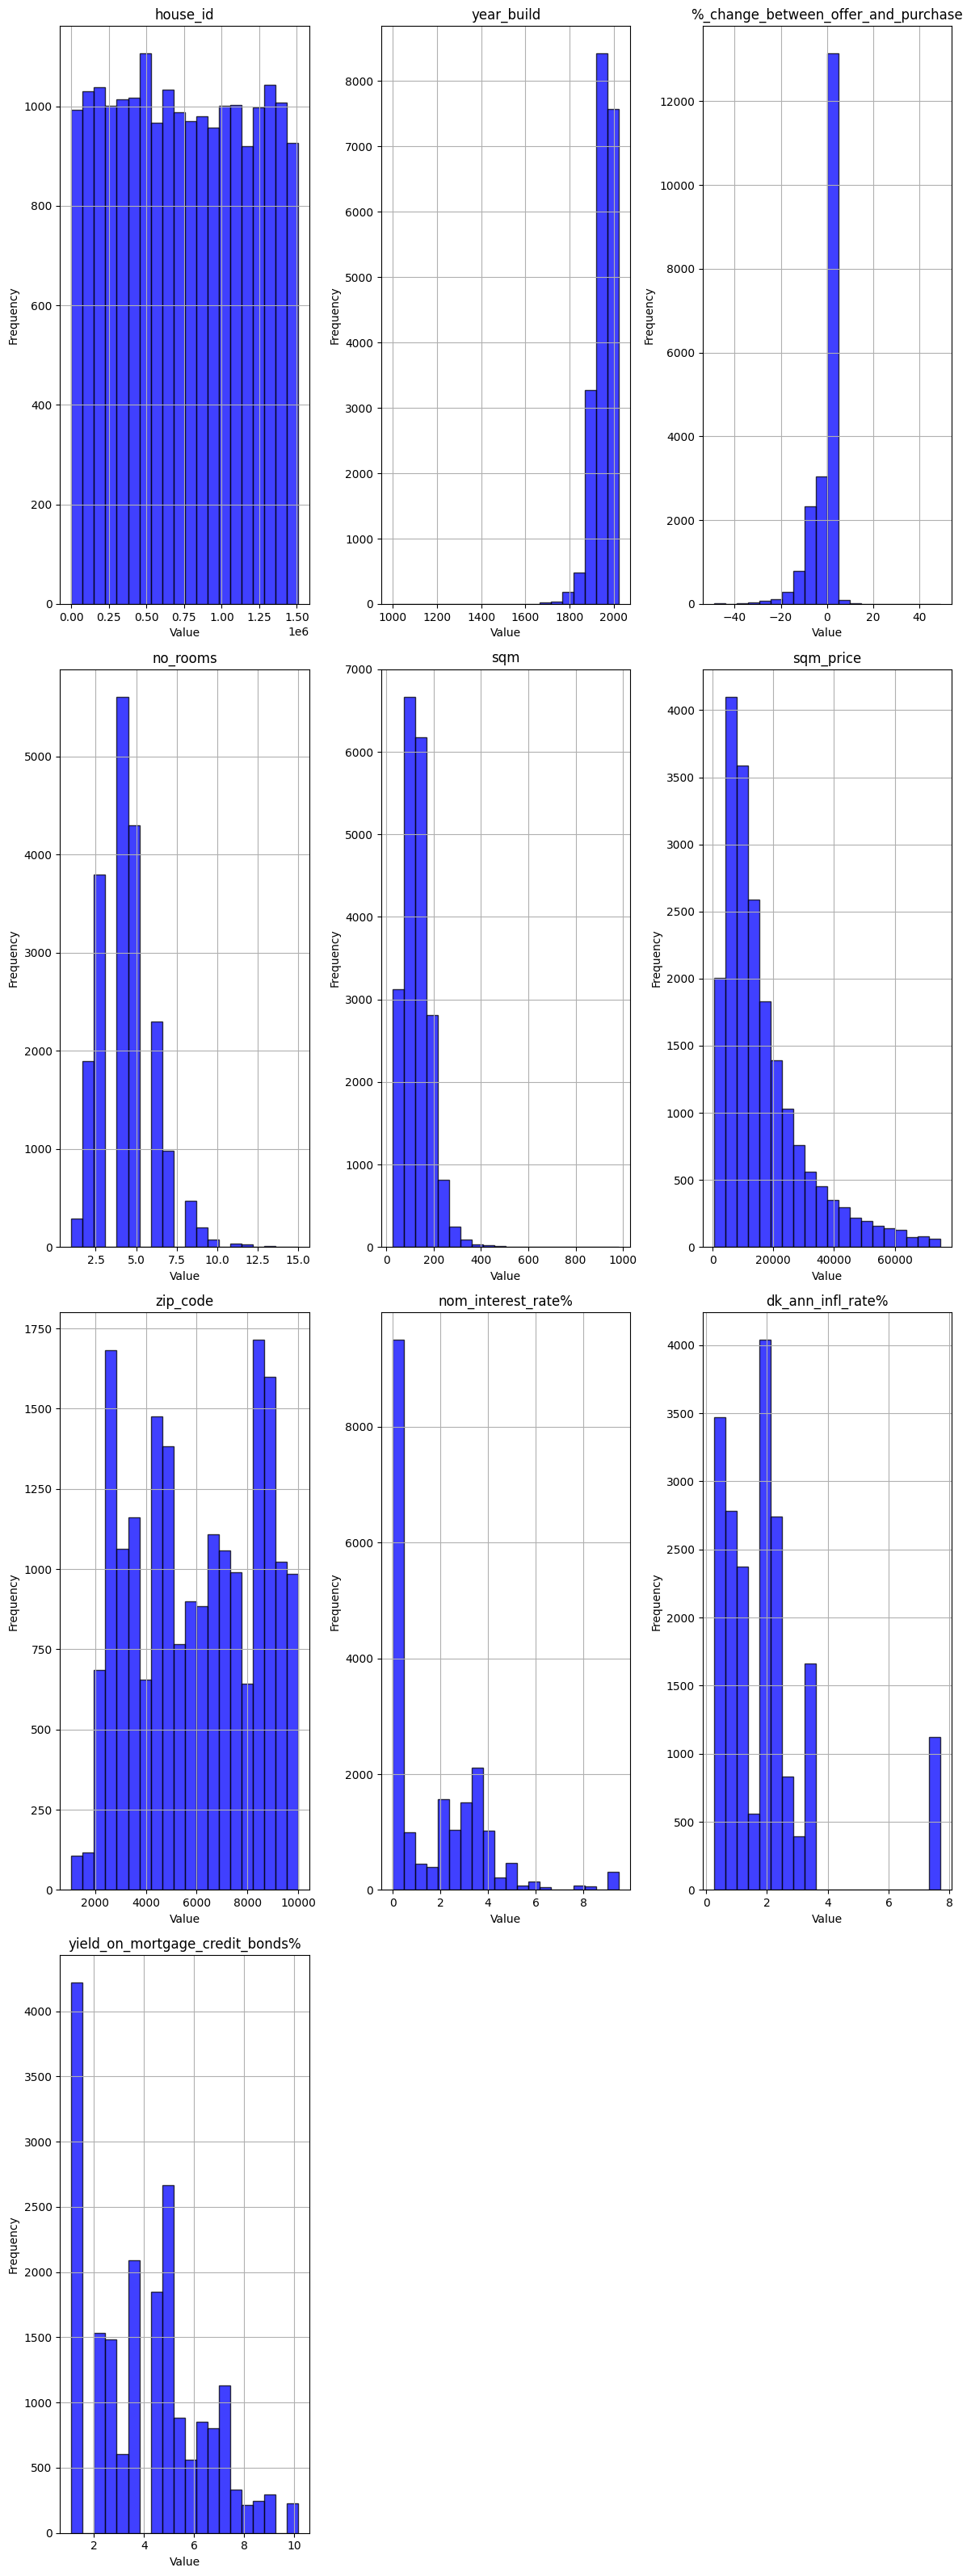

In [134]:
plot_histograms(X_test)